# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('combined_data.csv')

In [5]:
data.shape

(66280, 15)

In [6]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.2590,85.1385,319.5,1.0,1.0,2013-01-01,511,Terra,MODIS,70,6.2,295.5,18.0,D,0
1,28.3517,82.9548,308.4,1.0,1.0,2013-01-01,511,Terra,MODIS,67,6.2,288.2,10.5,D,0
2,29.0575,82.4327,308.6,1.1,1.0,2013-01-01,511,Terra,MODIS,33,6.2,287.3,9.1,D,0
3,28.4146,84.5473,304.5,1.0,1.0,2013-01-01,511,Terra,MODIS,32,6.2,291.5,8.1,D,0
4,29.0424,81.9060,302.7,2.8,1.6,2013-01-01,824,Aqua,MODIS,41,6.2,290.8,24.7,D,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66280 entries, 0 to 66279
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    66280 non-null  float64
 1   longitude   66280 non-null  float64
 2   brightness  66280 non-null  float64
 3   scan        66280 non-null  float64
 4   track       66280 non-null  float64
 5   acq_date    66280 non-null  object 
 6   acq_time    66280 non-null  int64  
 7   satellite   66280 non-null  object 
 8   instrument  66280 non-null  object 
 9   confidence  66280 non-null  int64  
 10  version     66280 non-null  float64
 11  bright_t31  66280 non-null  float64
 12  frp         66280 non-null  float64
 13  daynight    66280 non-null  object 
 14  type        66280 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 7.6+ MB


In [8]:
data.select_dtypes(include=['float64','int64']).columns


Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')

In [9]:
data.select_dtypes(include='object').columns

Index(['acq_date', 'satellite', 'instrument', 'daynight'], dtype='object')

In [10]:
len(data.select_dtypes(include='object').columns)

4

In [11]:
data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

# Dealing with the missing values

In [12]:
data.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [13]:
# remove the column named satellite
data.drop('satellite',axis=1,inplace=True)

In [14]:
data.shape

(66280, 14)

In [15]:
data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'instrument', 'confidence', 'version', 'bright_t31', 'frp',
       'daynight', 'type'],
      dtype='object')

In [16]:
# number of unique values in diagnosis column
data['instrument'].unique()

array(['MODIS'], dtype=object)

In [17]:
data.drop(['instrument','version'],axis=1,inplace=True)


In [18]:
data['confidence'].unique()


array([ 70,  67,  33,  32,  41,  86,  76,  74,  56,  84,  83,  72,  80,
        43, 100,  87,  46,  71,  36,  66,  39,  21,   9,  68,  77,  29,
        15,  50,  89,  26,  25,  51,  99,  44,  58,   0,  73,  92,  93,
        62,  37,  13,  40,  27,  48,  79,  20,  60,  52,  59,  45,  85,
        82,  54,  35,  57,  63,  53,  75,  55,  65,  30,  61,  42,  81,
        34,  91,  78,  96,  47,  49,  64,  24,  28,  23,  69,  19,  38,
        97,  31,  94,  95,  17,  88,  22,   7,  11,   6,  90,  10,  98,
         5,  18,  12,   2,  14,  16,   4,   8,   3,   1], dtype=int64)

In [19]:
data["acq_time"].unique()

array([ 511,  824,  728, 1653,  459,  810,  811,  542,  715,  716,  759,
        530,  703,  746,  747,  517,  830,  734,  735,  818,  722,  723,
        453,  805,  752,  753,  523,  836, 1622,  428,  429,  740,  741,
        733,  505,  758,  817,  804,  709,  548,  710,  441,  524,  657,
       1641,  447,  518,  506,  536, 1634,  658,  729,  500, 1640,  704,
       1628, 1616, 1604, 1647,  454, 2012, 1635, 1718, 2000,  659, 1623,
       1705,  512,  646, 1610, 2030,  812, 2018, 2006, 1629,  435,  748,
       1712, 1954,  652, 1617, 2036, 1659, 1941, 2024,  806,  800, 1730,
        554,  434,  600,  727,  440,  446,  842,  754,  529,  535,  422,
        823, 1953,  717, 1947, 1603, 1545,  423, 2042,  607, 1557, 1558,
       2005, 1711,  651, 1646, 2054, 1959, 1609, 2048, 1706,  555, 1654,
       1724,  601, 1700,  549, 1648, 2106, 2011,  613,  645,  606,  537,
        711,  543, 1642,  531, 1630, 1636,  525, 2017,  829,  721,  835,
        739, 2035,  816, 1605, 2023,  410, 1929, 15

In [20]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
0,28.2590,85.1385,319.5,1.0,1.0,2013-01-01,511,70,295.5,18.0,D,0
1,28.3517,82.9548,308.4,1.0,1.0,2013-01-01,511,67,288.2,10.5,D,0
2,29.0575,82.4327,308.6,1.1,1.0,2013-01-01,511,33,287.3,9.1,D,0
3,28.4146,84.5473,304.5,1.0,1.0,2013-01-01,511,32,291.5,8.1,D,0
4,29.0424,81.9060,302.7,2.8,1.6,2013-01-01,824,41,290.8,24.7,D,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66280 entries, 0 to 66279
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    66280 non-null  float64
 1   longitude   66280 non-null  float64
 2   brightness  66280 non-null  float64
 3   scan        66280 non-null  float64
 4   track       66280 non-null  float64
 5   acq_date    66280 non-null  object 
 6   acq_time    66280 non-null  int64  
 7   confidence  66280 non-null  int64  
 8   bright_t31  66280 non-null  float64
 9   frp         66280 non-null  float64
 10  daynight    66280 non-null  object 
 11  type        66280 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 6.1+ MB


In [22]:
data['daynight'].unique()


array(['D', 'N'], dtype=object)

Convert Confience to 0, 1, 2, 3

In [23]:
def map_confidence(confidence):
    if 1 <= confidence <= 40:
        return 0
    elif 40 < confidence <= 60:
        return 1
    # elif 33 < confidence <= 66:
    #     return 2
    else:
        return 2


# Apply the mapping function to the 'confidence' column
data['confidence'] = data['confidence'].apply(map_confidence)

# One hot encoder

In [24]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# use one hot encode


In [25]:
label_encoder = LabelEncoder()
data['confidence'] = label_encoder.fit_transform(data['confidence'])
data['daynight'] = label_encoder.fit_transform(data['daynight'])

In [26]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
0,28.2590,85.1385,319.5,1.0,1.0,2013-01-01,511,2,295.5,18.0,0,0
1,28.3517,82.9548,308.4,1.0,1.0,2013-01-01,511,2,288.2,10.5,0,0
2,29.0575,82.4327,308.6,1.1,1.0,2013-01-01,511,0,287.3,9.1,0,0
3,28.4146,84.5473,304.5,1.0,1.0,2013-01-01,511,0,291.5,8.1,0,0
4,29.0424,81.9060,302.7,2.8,1.6,2013-01-01,824,1,290.8,24.7,0,0


In [27]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
0,28.2590,85.1385,319.5,1.0,1.0,2013-01-01,511,2,295.5,18.0,0,0
1,28.3517,82.9548,308.4,1.0,1.0,2013-01-01,511,2,288.2,10.5,0,0
2,29.0575,82.4327,308.6,1.1,1.0,2013-01-01,511,0,287.3,9.1,0,0
3,28.4146,84.5473,304.5,1.0,1.0,2013-01-01,511,0,291.5,8.1,0,0
4,29.0424,81.9060,302.7,2.8,1.6,2013-01-01,824,1,290.8,24.7,0,0


In [28]:
data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'confidence', 'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [29]:
x = data.drop('confidence',axis=1)

In [30]:
y = data['confidence']

In [31]:
x.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,bright_t31,frp,daynight,type
0,28.2590,85.1385,319.5,1.0,1.0,2013-01-01,511,295.5,18.0,0,0
1,28.3517,82.9548,308.4,1.0,1.0,2013-01-01,511,288.2,10.5,0,0
2,29.0575,82.4327,308.6,1.1,1.0,2013-01-01,511,287.3,9.1,0,0
3,28.4146,84.5473,304.5,1.0,1.0,2013-01-01,511,291.5,8.1,0,0
4,29.0424,81.9060,302.7,2.8,1.6,2013-01-01,824,290.8,24.7,0,0


In [32]:
y.head()

0    2
1    2
2    0
3    0
4    1
Name: confidence, dtype: int64

In [33]:
y.value_counts()

2    35381
1    20769
0    10130
Name: confidence, dtype: int64

# To know which value is assigned to what

In [34]:
# original_labels = label_encoder.classes_

# # Print the mapping of encoded values to original labels
# for encoded_value, original_label in enumerate(original_labels):
#     print(f"Encoded Value {encoded_value}: Original Label '{original_label}'")

C:\Users\Sulav Bhandari\AppData\Local\Temp\ipykernel_11488\231969958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corrwith(y).plot.bar(figsize=(20,10), title="Correlation with diagnosis_M", fontsize=15, rot=90, grid=True)


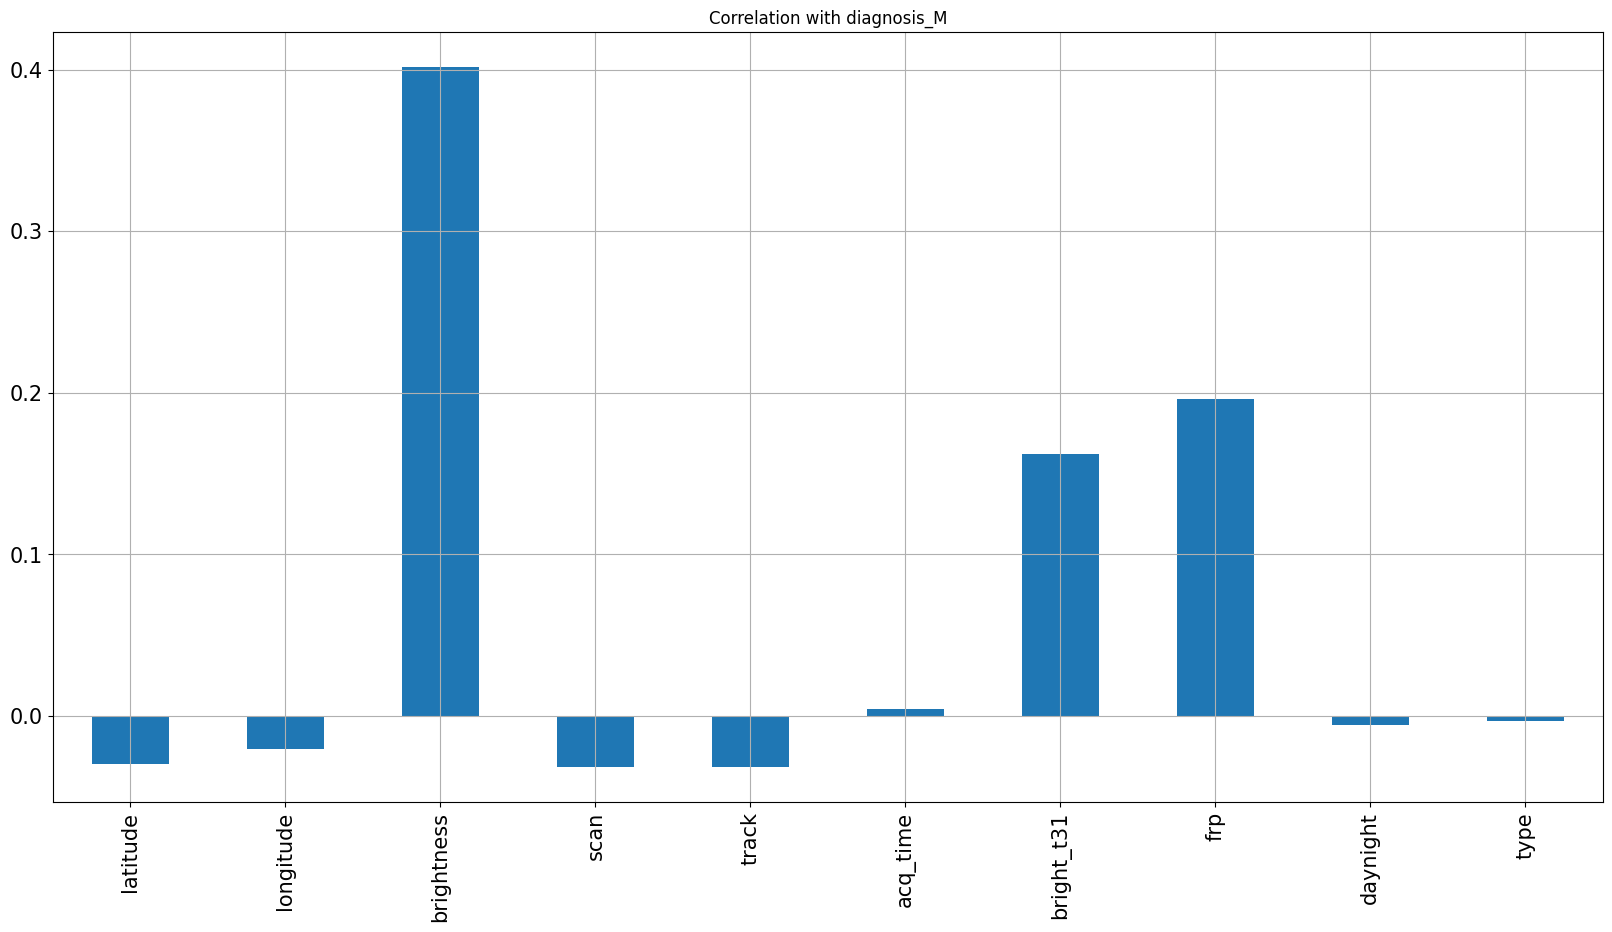

In [35]:
x.corrwith(y).plot.bar(figsize=(20,10), title="Correlation with diagnosis_M", fontsize=15, rot=90, grid=True)
plt.show()

C:\Users\Sulav Bhandari\AppData\Local\Temp\ipykernel_11488\1203283205.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True,linewidths=0.2, fmt='.2f',cmap='coolwarm')


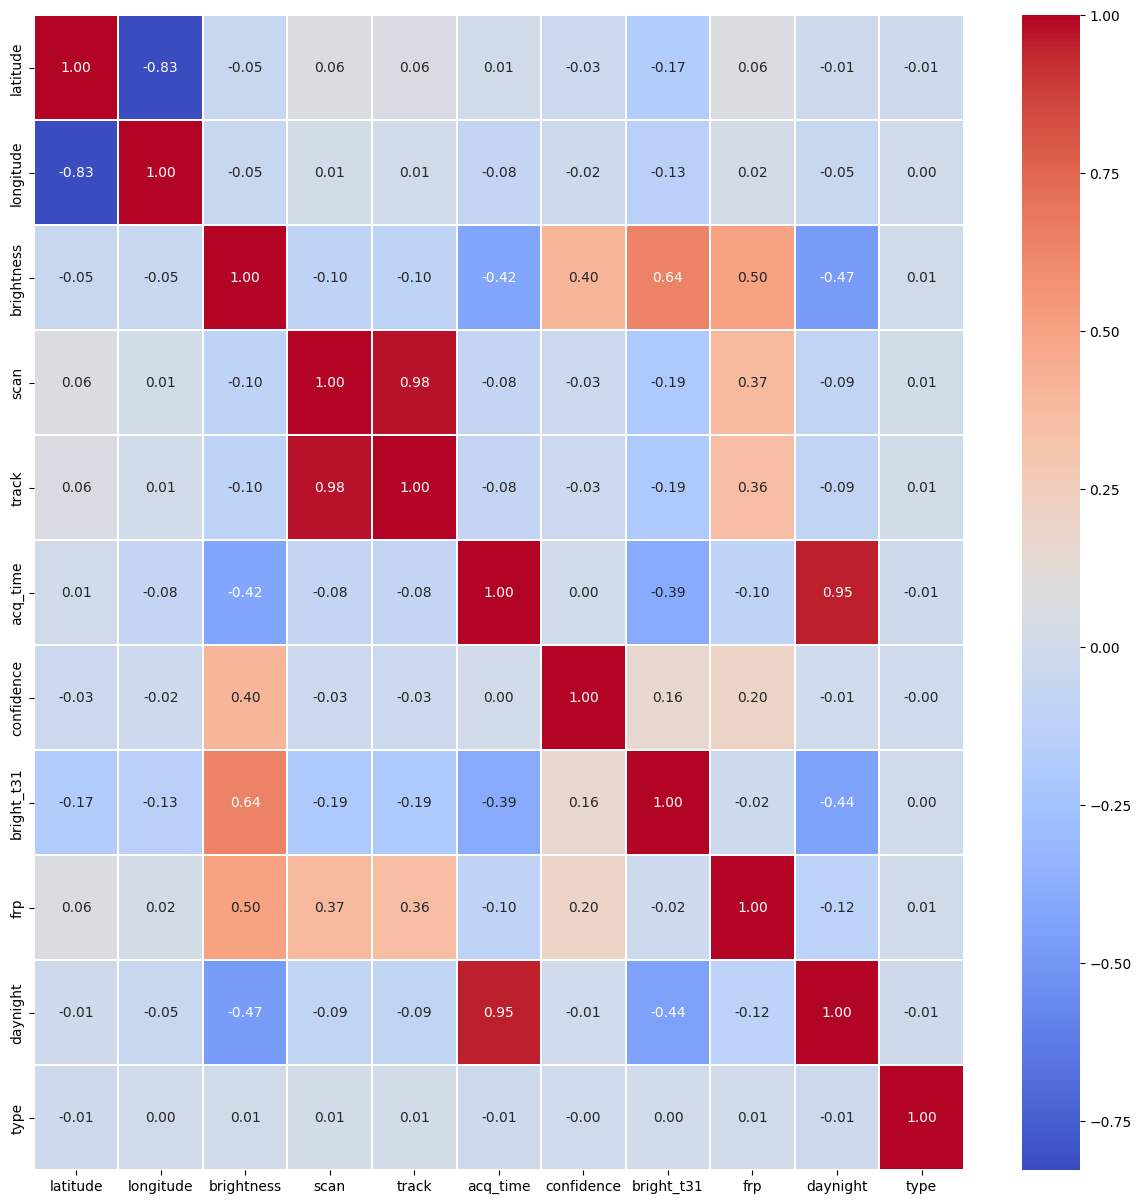

In [36]:
#heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(), annot=True,linewidths=0.2, fmt='.2f',cmap='coolwarm')
plt.show()

# Heatmap of Fire Intensity

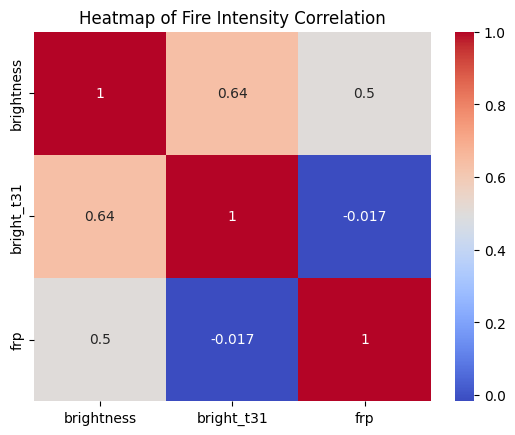

In [37]:
sns.heatmap(data[['brightness', 'bright_t31', 'frp']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Fire Intensity Correlation')
plt.show()

In [41]:
data.shape

(66280, 12)


# Visualizing of Fire Location

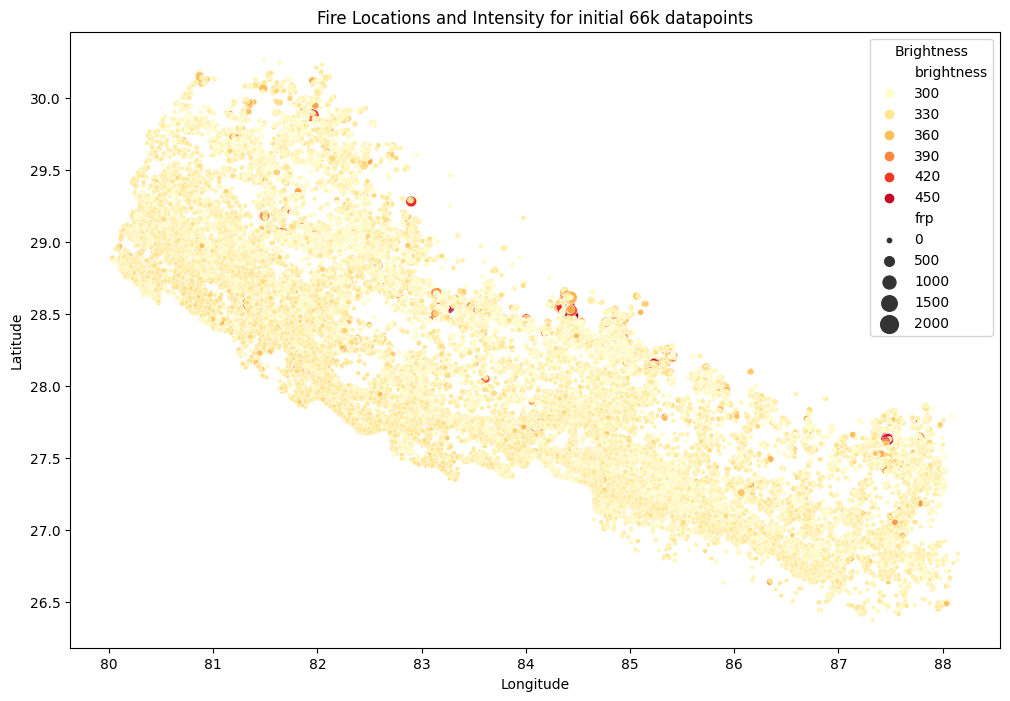

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, hue='brightness', palette='YlOrRd', size='frp', sizes=(10, 200))
plt.title('Fire Locations and Intensity for initial 66k datapoints')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Brightness', loc='upper right')
plt.show()

In [40]:
data.latitude.describe()

count    66280.000000
mean        28.153500
std          0.763784
min         26.377500
25%         27.533200
50%         28.145600
75%         28.757125
max         30.266900
Name: latitude, dtype: float64


# Fire according to the month

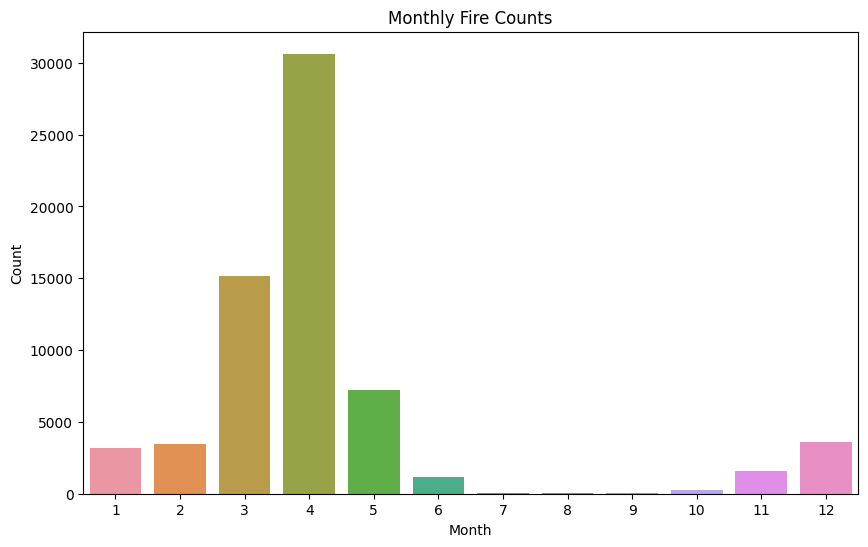

In [37]:
# Temporal Analysis
data['acq_date'] = pd.to_datetime(data['acq_date'])
data['month'] = data['acq_date'].dt.month
data['day'] = data['acq_date'].dt.day
monthly_counts = data['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Monthly Fire Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [38]:
data['acq_date']
data['month']
data['month'].value_counts()

4     30631
3     15149
5      7197
12     3586
2      3431
1      3181
11     1561
6      1160
10      256
9        68
8        36
7        24
Name: month, dtype: int64

# Kati confidence xa ta fire lagney

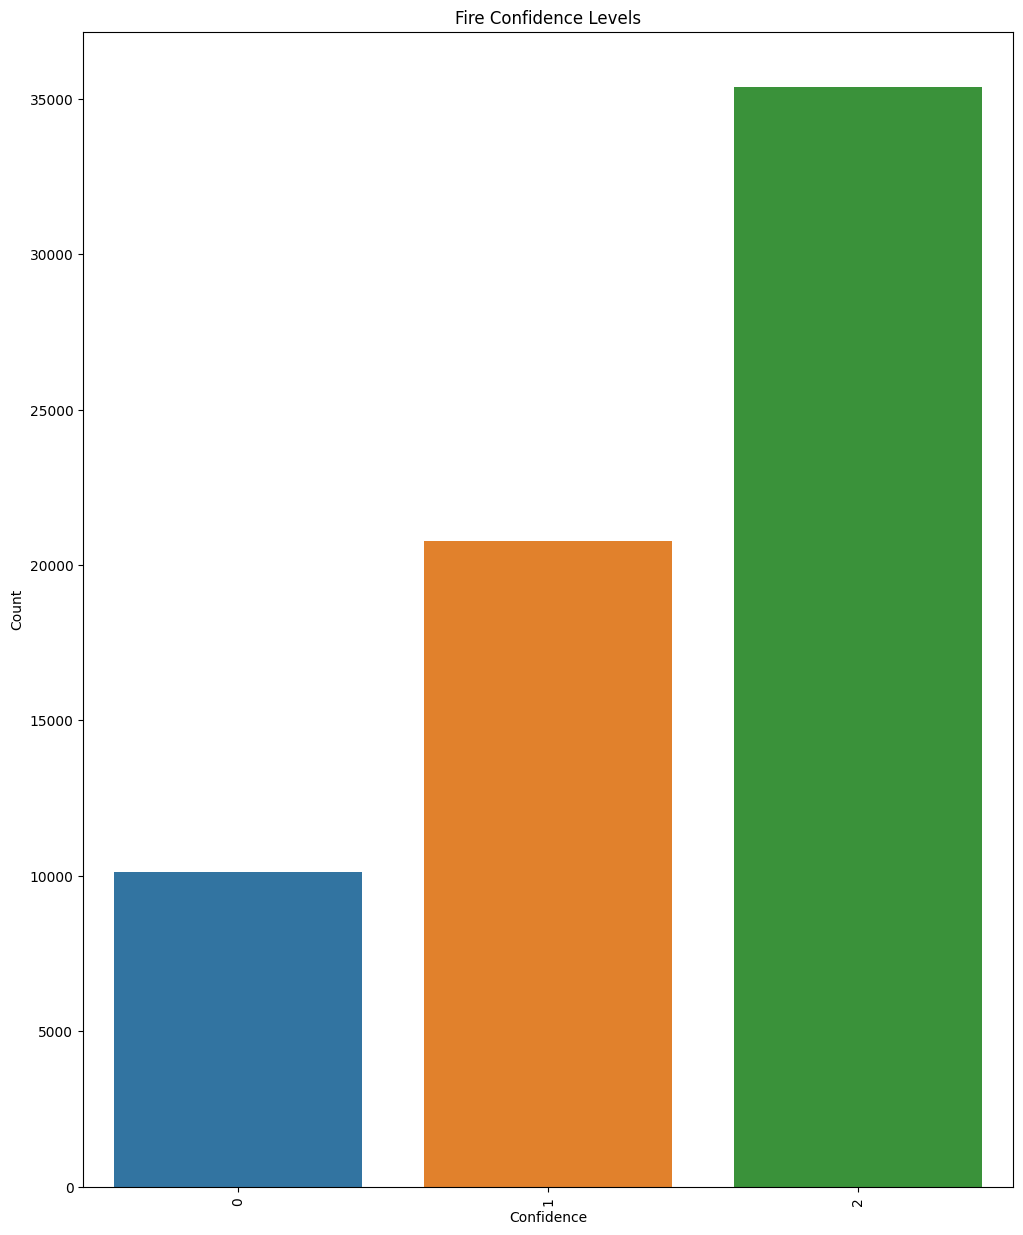

In [39]:
plt.figure(figsize=(12,15))
sns.countplot(x=data['confidence'])
plt.title('Fire Confidence Levels')
plt.xlabel('Confidence')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

# Fire Radiative Power (FRP) Analysis


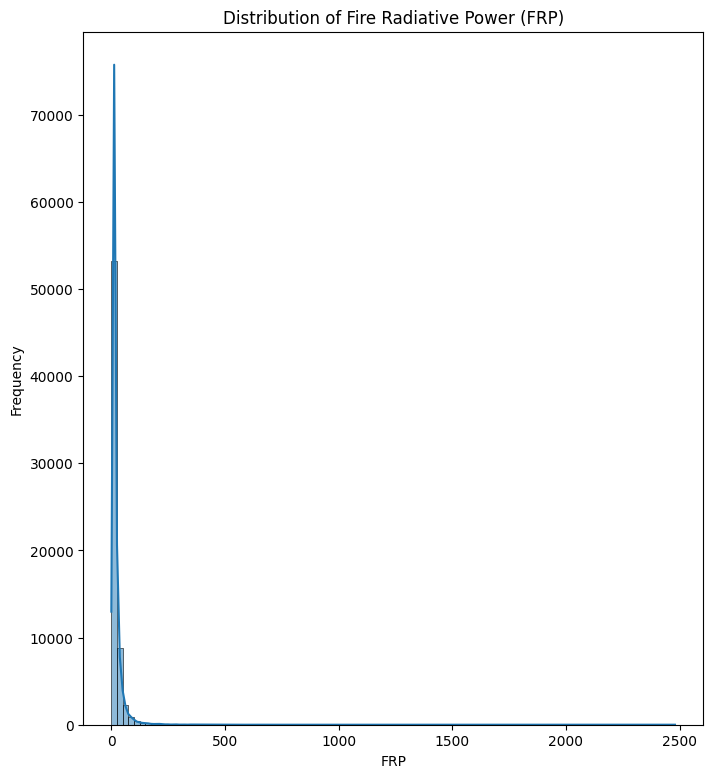

In [40]:
plt.figure(figsize=(8,9
                    ))
sns.histplot(data['frp'], bins=100, kde=True)
plt.title('Distribution of Fire Radiative Power (FRP)')
plt.xlabel('FRP')
plt.ylabel('Frequency')
plt.show()

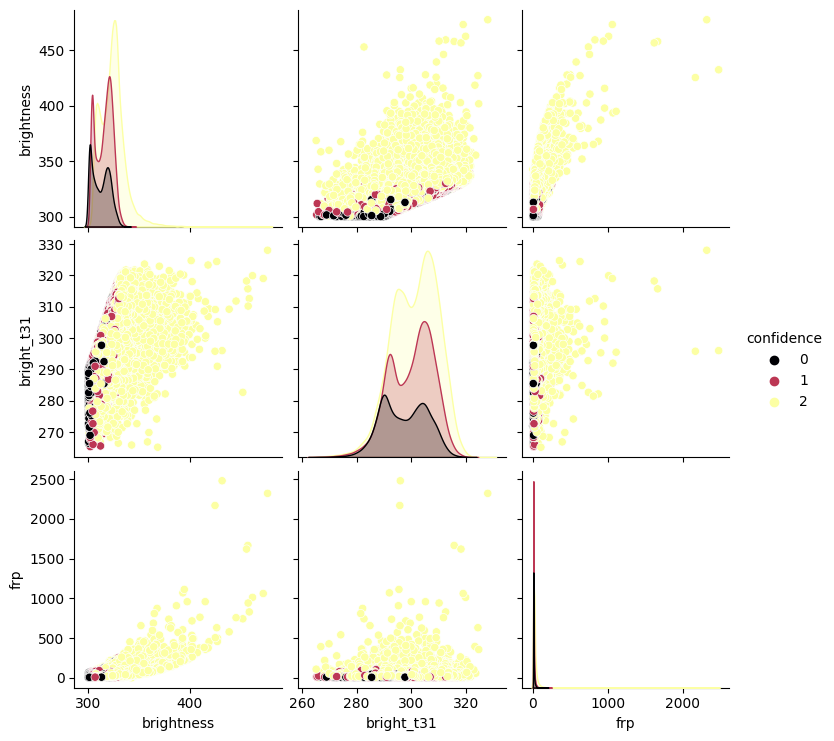

In [42]:
sns.pairplot(data[['brightness', 'bright_t31', 'frp', 'confidence']], hue='confidence', palette='inferno')

In [192]:
data['latitude'].value_counts()

27.5388    16
27.5308    15
27.5310    14
27.5170    13
27.5196    13
           ..
29.5110     1
29.5976     1
28.7054     1
28.7151     1
29.6767     1
Name: latitude, Length: 25760, dtype: int64

In [193]:
data['brightness'] = np.ceil(data['brightness']).astype(int)
data['bright_t31'] = np.ceil(data['bright_t31']).astype(int)
data['frp'] = np.ceil(data['frp']).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66280 entries, 0 to 66279
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   latitude    66280 non-null  float64       
 1   longitude   66280 non-null  float64       
 2   brightness  66280 non-null  int32         
 3   scan        66280 non-null  float64       
 4   track       66280 non-null  float64       
 5   acq_date    66280 non-null  datetime64[ns]
 6   acq_time    66280 non-null  int64         
 7   confidence  66280 non-null  int64         
 8   bright_t31  66280 non-null  int32         
 9   frp         66280 non-null  int32         
 10  daynight    66280 non-null  int32         
 11  type        66280 non-null  int64         
 12  month       66280 non-null  int64         
 13  day         66280 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int32(4), int64(5)
memory usage: 6.1 MB


# Test whether the fire will occur or not



In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [195]:
X = data[['latitude','longitude','month','day']]

In [196]:
Y = data['confidence']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [198]:
model = LogisticRegression()

In [199]:
model.fit(X_train,y_train)

LogisticRegression()

In [200]:
y_pred = model.predict(X_test)

In [201]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

c:\Users\Sulav Bhandari\.conda\envs\mlcc\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sulav Bhandari\.conda\envs\mlcc\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sulav Bhandari\.conda\envs\mlcc\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
accuracy

0.5321363910681955

In [203]:
cm = confusion_matrix(y_test, y_pred)

In [204]:
cm

array([[   0,    0, 2114],
       [   0,    0, 4088],
       [   0,    0, 7054]], dtype=int64)

### Testing all algorithms

In [205]:
# Checking with other algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [206]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50)


In [207]:
# creating a dictionary of all the models
clfs = {
    "SVC": svc,
    "KN": knc,
    "NB": mnb,
    "DT": dtc,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "BgC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "xgb": xgb,
}


In [208]:
def train_classifier(clf, X_train, y_train,X_test,y_test):    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
return accuracy

In [209]:

train_classifier(dtc,X_train,y_train,X_test,y_test) 

0.5316837658418829

In [210]:
accuracy_scores = []

for name, clf in clfs.items():

    current_accuracy = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print("For ", name)
    print("Accuracy: ", current_accuracy)
    accuracy_scores.append(current_accuracy)


For  SVC
Accuracy:  0.5321363910681955
For  KN
Accuracy:  0.4625075437537719
For  NB
Accuracy:  0.5321363910681955
For  DT
Accuracy:  0.5316837658418829
For  LR
Accuracy:  0.5321363910681955


c:\Users\Sulav Bhandari\.conda\envs\mlcc\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For  RF
Accuracy:  0.5030175015087508
For  AdaBoost
Accuracy:  0.5313065781532891
For  BgC
Accuracy:  0.4996982498491249
For  ETC
Accuracy:  0.49419130959565477
For  GBDT
Accuracy:  0.5318346409173205
For  xgb
Accuracy:  0.5322118286059143


In [211]:
performance_df = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy": accuracy_scores}).sort_values(by="Accuracy", ascending=False)
performance_df


,Algorithm,Accuracy
10,xgb,0.532212
0,SVC,0.532136
2,NB,0.532136
4,LR,0.532136
9,GBDT,0.531835
3,DT,0.531684
6,AdaBoost,0.531307
5,RF,0.503018
7,BgC,0.499698
8,ETC,0.494191


# Random Forest

In [212]:
train_classifier(xgb,X_train,y_train,X_test,y_test)

0.5322118286059143

In [213]:
train_classifier(dtc,X_train,y_train,X_test,y_test) 

0.5316837658418829

In [214]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[   0,    0, 2114],
       [   0,    0, 4088],
       [   0,    0, 7054]], dtype=int64)